# 普通爬取

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import json
import os
import random

In [2]:
headers = {'Cookie': 'shshshfpa=c3766c72-315f-4f81-a6bf-0272d2cf96df-1692975073; __jdu=16929750709931530316815; joyya=1718709779.1718709780.15.062dbcu; mba_muid=16929750709931530316815; pinId=8V0itqUd23-I50ESay18WnpQBniYHoiX; qrsc=3; __jdv=76161171|github.com|-|referral|-|1730816101987; jsavif=1; jsavif=1; xapieid=jdd032SMZPSHUQHVIUG7NSU56CC7HSOQ3SBHYFNKM36ULTY5GPAR2PTDNIAHTDEFF5RXQGHBXKPB7YJQ3LYLHTJEN3Z3W4IAAAAMS7SW5KSAAAAAACFD7QWVVA56GTYX; shshshfpx=c3766c72-315f-4f81-a6bf-0272d2cf96df-1692975073; rkv=1.0; areaId=20; ipLoc-djd=20-1720-22907-59675; wlfstk_smdl=7ufmju8ygt48bwn7548p1ercssjgxip4; 3AB9D23F7A4B3C9B=2SMZPSHUQHVIUG7NSU56CC7HSOQ3SBHYFNKM36ULTY5GPAR2PTDNIAHTDEFF5RXQGHBXKPB7YJQ3LYLHTJEN3Z3W4I; TrackID=17M9V9SlNo0JB-L2VEuos4zgsbx16vQgjyqvkaAjjrINH-nsBWObcjwYMyWO5jHgDtADJ8Po4oIhvmZahMSfm0a4ew6BQQz6xrETM3TvaNNMHY1vcd-x2t8HIBv2eHO2c; thor=CBFDC4478337E48A0616B8683F05BA33A0582017BA36D86C42D81D0988D5249A737CEA370C7C7AD74D0197744C36991B9937B6437DEF6992F641C9D6B1275230EAC28E5DC8209F02184840E56A33C6F3FA6461C68D84CBC2781593680BAAAC6B232B5BC1E948422139E0A372FB2B154812D1F2021966C490F7B8CD2C0117AEC2B0A8C2FD31E024E93BFE2DEBAD1F16E2; light_key=AASBKE7rOxgWQziEhC_QY6ya8GmADUucODrRyvuGO2kATbT_XhdH8aNeLtL8IqAJ5X75fNLzafUszmFjnwVyOHFrRV1jjg; pin=%E4%B8%80%E5%8F%AA%E6%B1%AA_%E7%95%A5%E7%95%A5%E7%95%A5; unick=831ifsr1gi4s0e; ceshi3.com=000; _tp=KyBkyY9LXhUFJSOea55z5yy7Fs54HeCiaHzMYCGQnlcFc8E37wsK2qNjANWR99vHzn8BpflWlpZdtQ9cddO3OA%3D%3D; _pst=%E4%B8%80%E5%8F%AA%E6%B1%AA_%E7%95%A5%E7%95%A5%E7%95%A5; __jda=181111935.16929750709931530316815.1692975070.1730816102.1730819965.10; __jdc=181111935; token=d9eaba1653faa8a9b2f26fe4806a9c08,3,961567; 3AB9D23F7A4B3CSS=jdd032SMZPSHUQHVIUG7NSU56CC7HSOQ3SBHYFNKM36ULTY5GPAR2PTDNIAHTDEFF5RXQGHBXKPB7YJQ3LYLHTJEN3Z3W4IAAAAMS7T5GAOIAAAAACOUE75Y62VNF4MX; __jdb=181111935.6.16929750709931530316815|10.1730819965; shshshfpb=BApXS6ffy__dAgMJiwxihNRR2awVpCScFB9DWV1xr9xJ1MiAGEoO2; flash=3_YUXdRfloUVlbvMFuvFRKrJB5hMmR4c7DGBcDMOniryba5fbivwI_sgrktgeIXx48oS9DTTLnfBV4IW5nJuYa5S92CjOSBsF_Uv6Ar1yLNEc8xH2RO4qXpFpVxaQc99CyQExNUB4-wCPRtSWjldINHuvs6qDEoQLjAoKxEcAEjZrz5A98p7p-eqSuEV**',
           'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36',
          }

In [5]:
def get_img_list(keyword,page):
    url = f'https://search.jd.com/Search?keyword={keyword}&wq={keyword}&pvid=f1f000533981403d8144ac11f1dd736c&isList=0&page={page}&s=56&click=0&log_id=1731595650821.3645'
    wbdata = requests.get(url, headers=headers).text
    soup = BeautifulSoup(wbdata, 'lxml')
    item_list = soup.select("li.gl-item > div.gl-i-wrap > div.p-img > a")
    ret_list=[]
    
    # 设置下载的文件夹
    folder = './' + keyword
    if not os.path.exists(folder):
        os.mkdir(folder)
        
    # 对于每一个找到的<a>标签，查找其内部的<img>标签
    for a in item_list:
        link=a['href'] # 找到链接
        parts = link.replace(".html", "").split("/") #//item.jd.com/100119685901.html
        skuid = parts[-1]  # 获取最后一个部分，即为商品ID 
        # 查找<a>标签下的<img>标签
        img = a.find('img')
#         print(img)
        img_link="https:"+img.get("data-lazy-img").replace(".avif", "").replace("n7/jfs", "n1/s800x800_jfs")
        #img14.360buyimg.com/n7/jfs/t1/224286/3/13500/44961/6659bd46F429c3bcb/9bcea9940fea8899.jpg
        data={"skuid":skuid,"img_link":img_link}
        ret_list.append(data)
        
        image_data = requests.get(url=img_link, headers=headers).content  # 提取图片内容数据
        image_name = skuid + '.jpg'  # 图片名
        image_path = folder + '/' + image_name  # 图片保存路径
        with open(image_path, 'wb') as f:  # 保存数据
            f.write(image_data)
#             print(image_name, '下载成功')
            f.close()
            
    return ret_list

In [6]:
ret_list=get_img_list("手机",1)
ret_list

[{'skuid': '100101198540',
  'img_link': 'https://img10.360buyimg.com/n1/s800x800_jfs/t1/224286/3/13500/44961/6659bd46F429c3bcb/9bcea9940fea8899.jpg'},
 {'skuid': '100044835937',
  'img_link': 'https://img12.360buyimg.com/n1/s800x800_jfs/t1/223255/37/49839/57468/67470521Fa18452a5/79052e02010bbcb8.jpg'},
 {'skuid': '100152607816',
  'img_link': 'https://img11.360buyimg.com/n1/s800x800_jfs/t1/220743/31/47740/83547/673db94bFbd4f8a80/f525217bd7079953.jpg'},
 {'skuid': '100051402827',
  'img_link': 'https://img12.360buyimg.com/n1/s800x800_jfs/t1/189790/40/31815/49677/63afac0eF12acd278/ab341b6272870da6.jpg'},
 {'skuid': '100112654526',
  'img_link': 'https://img11.360buyimg.com/n1/s800x800_jfs/t1/181783/32/53457/53047/67445e2dFbd5f8058/13d12e94fb16f45a.jpg'},
 {'skuid': '10115678658407',
  'img_link': 'https://img12.360buyimg.com/n1/s800x800_jfs/t1/178545/6/48094/85807/66ed2318F46629320/c27126d819d2abc9.png'},
 {'skuid': '100147424746',
  'img_link': 'https://img11.360buyimg.com/n1/s800x800_

# Selenium入门

In [ ]:
# pip install selenium

# 查看版本：chrome://settings/help

# Chrome: https://chromedriver.storage.googleapis.com/index.html
# 最新版本谷歌驱动：https://googlechromelabs.github.io/chrome-for-testing/      
# 国内镜像地址：http://npm.taobao.org/mirrors/chromedriver/
# Edge:  https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/
# Firefox:  https://github.com/mozilla/geckodriver/releases
# Safari:  https://webkit.org/blog/6900/webdriver-support-in-safari-10/

# https://www.cnblogs.com/cloud07/p/17933603.html

In [1]:
from selenium import webdriver

# 指定ChromeDriver的路径
chrome_driver_path = r"C:\Users\Administrator\Desktop\数据标注\chromedriver-win64\chromedriver.exe"  # 根据实际情况替换这里的路径

# 初始化WebDriver实例
# selenium新版本的语法有点变化，实在不行就装回低版本
chromeService = webdriver.ChromeService(executable_path=chrome_driver_path)
driver = webdriver.Chrome(service = chromeService)

# Service = webdriver.EdgeService(executable_path=chrome_driver_path)
# driver = webdirver.Edge(service = Service)

# 打开指定URL
driver.get("http://www.baidu.com")

# 打印当前页面的标题
print(driver.title)

# 关闭浏览器
# driver.quit()

百度一下，你就知道


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

chrome_driver_path = r"C:\Users\Administrator\Desktop\数据标注\chromedriver-win64\chromedriver.exe"  # 根据实际情况替换这里的路径

# 控制chrome浏览器
chromeService = webdriver.ChromeService(executable_path=chrome_driver_path)
driver = webdriver.Chrome(service = chromeService)

#窗口最大化
driver.maximize_window()
# 输入网址
driver.get("https://www.baidu.com/")
# 找到文本框，输入文字
driver.find_element(By.XPATH,'//*[@id="kw"]').send_keys("车道线") #//*[@id="kw"]
#driver.find_element(By.XPATH,'//*[@id="kw"]').send_keys("车道线").send_keys(Keys.ENTER)

#找到按钮，单击
driver.find_element(By.XPATH,'//*[@id="su"]').click() #//*[@id="su"]
#停一下，等待加载完毕
time.sleep(5)

# search = driver.find_element(by=By.ID, value='kw')
# search.send_keys('车道线')
# search.send_keys(Keys.ENTER)

In [3]:
#找到a标签，单击
driver.find_element(By.XPATH,'//*[@id="s_tab"]/div/a[1]').click() #//*[@id="s_tab"]/div/a[1]
#停一下，等待加载完毕
time.sleep(5)

In [ ]:
# 切换窗口
# driver.switch_to.window(driver.window_handles[1])

In [4]:
#向下滑动10次
for i in range(10):
    #执行js
    driver.execute_script("window.scrollTo(0,10000)") #0左右滑动 10000上下滑动
    time.sleep(5)

In [12]:
#获取页面html
html = driver.page_source
# 关闭
# driver.quit()

'<html><head><script async="" src="https://fex.bdstatic.com/hunter/alog/dp.min.js?v=-20060-20060"></script><script async="" src="https://fex.bdstatic.com/hunter/alog/alog.min.js?v=-20060-20060"></script><script async="" src="https://fex.bdstatic.com/hunter/alog/alog.min.js?v=-20060-20060"></script><script>\n    (function (context) {\n        var data = {};\n        var url = \'//imgstat.baidu.com/17.gif\';\n        var start = +new Date;\n        var createQuery = function (data) {\n            var ret = [];\n            for (var key in data) {\n                ret.push(key + \'=\' + data[key]);\n            }\n            return ret.join(\'&\');\n        };\n\n        var _mergeCommPara = function (data) {\n            data.etype = \'speed\';\n            data.page = \'result\';\n            data.logid = "10581213562254313112";\n            data.sid = \'ab3a0701ef8a356617514f3f90c2a08cdee90c0f\';\n            data.wh = window.screen.width + \'x\' + window.screen.height ;\n            
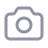
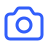
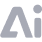

In [13]:
html

In [14]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html.parser")
img_list = soup.find_all("li", class_="imgitem")

In [15]:
list1=[]
for i in img_list: #对每张图片做循环
    for attr in ["data-bigimgurl", "data-imgurl", "data-objurl"]: #依次找url
        value = i.get(attr)
        if value:
            img_url=value
            list1.append(img_url)
            break
list1

['https://img0.baidu.com/it/u=3437811076,1844387413&fm=253&fmt=auto&app=138&f=JPEG?w=640&h=480',
 'https://twm.autohome.com.cn/cjh.autoimg.cn/chejiahaodfs/g31/M07/8C/DC/752x0_q100_autohomecar__ChxoHWZYpTOAfiMyAABIELj6UoA061.jpg?text/5pGp5omY5oqK5omL5bCP6aOe/fontSize/13',
 'https://k.sinaimg.cn/n/sinakd20240422s/110/w859h851/20240422/30bb-74c0ae31d6b6ac9a56cba955ba7b426e.png/w700d1q75cms.jpg?by=cms_fixed_width',
 'https://ww1.sinaimg.cn/mw690/67f80bafly1hrarg4bcr5j22c0340b2b.jpg',
 'https://img1.baidu.com/it/u=1675362394,494821507&fm=253&fmt=auto&app=138&f=JPEG?w=750&h=549',
 'https://pic.rmb.bdstatic.com/bjh/news/ada6c48ea170332b4cdaad28c30fcca5.jpeg',
 'https://t10.baidu.com/it/u=2232016313,224153297&fm=30&app=106&f=JPEG?w=640&h=426&s=299A5ED9C23C45840ABDB4520300C090',
 'https://p3.toutiaoimg.com/origin/pgc-image/92aea62ab864455d86c3ceaad1ee9311.jpg?_iz=58558&from=article.pc_detail&x-expires=1668415710&x-signature=QDDeSJgVIHc2Te86F2HgClyQHpQ%3D',
 'https://pic.quanjing.com/3d/ib/QJ630

In [17]:
import os
import requests

# 创建文件夹
path = os.getcwd() + '/百度'
if not os.path.exists(path):
    os.mkdir(path)

headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36 SLBrowser/9.0.3.1311 SLBChan/105',
    }
    
for t,i in enumerate(list1):
    try:
#         res = requests.get(i, headers=headers)
        res = requests.get(i)
        # 图片内容写入文件
        with open(path + '/' + str(t) + '.jpg', mode='wb') as f:
            f.write(res.content)
            print(f"正在下载图片，图片名：{t}.jpg")
    except:
        print(f"{i}无法下载")

正在下载图片，图片名：0.jpg
正在下载图片，图片名：1.jpg
正在下载图片，图片名：2.jpg
正在下载图片，图片名：3.jpg
正在下载图片，图片名：4.jpg
正在下载图片，图片名：5.jpg
正在下载图片，图片名：6.jpg
正在下载图片，图片名：7.jpg
正在下载图片，图片名：8.jpg
正在下载图片，图片名：9.jpg
正在下载图片，图片名：10.jpg
正在下载图片，图片名：11.jpg
正在下载图片，图片名：12.jpg
正在下载图片，图片名：13.jpg
正在下载图片，图片名：14.jpg
正在下载图片，图片名：15.jpg
正在下载图片，图片名：16.jpg
正在下载图片，图片名：17.jpg
正在下载图片，图片名：18.jpg
正在下载图片，图片名：19.jpg
正在下载图片，图片名：20.jpg
正在下载图片，图片名：21.jpg
正在下载图片，图片名：22.jpg
正在下载图片，图片名：23.jpg
正在下载图片，图片名：24.jpg
https://ali.jiancai.com/upload/user/jys003/201908081754569209.jpg?x-oss-process=style/sy860无法下载
https://www.hmting.com/data/attachment/forum/202105/07/144313kxubzpkpnnhi83se.png无法下载
正在下载图片，图片名：27.jpg
正在下载图片，图片名：28.jpg
正在下载图片，图片名：29.jpg
正在下载图片，图片名：30.jpg
正在下载图片，图片名：31.jpg
正在下载图片，图片名：32.jpg
正在下载图片，图片名：33.jpg
正在下载图片，图片名：34.jpg
正在下载图片，图片名：35.jpg
正在下载图片，图片名：36.jpg
https://pic4.zhimg.com/v2-5234290bf9d8e9245a2119a5d19d8b0b_r.jpg无法下载


# 爬淘宝

In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By
#from selenium.webdriver.support.wait import WebDriverWait
import pandas as pd
import numpy  as np
import time
 
chrome_driver_path = r"C:\Users\Administrator\Desktop\数据标注\chromedriver-win64\chromedriver.exe"  # 根据实际情况替换这里的路径

# 控制chrome浏览器
chromeService = webdriver.ChromeService(executable_path=chrome_driver_path)
driver = webdriver.Chrome(service = chromeService)

keyword = '手机'
driver.get('https://s.taobao.com/search?q={}'.format(keyword))  
time.sleep(15)
print('请在15s内完成扫码')

请在15s内完成扫码


In [14]:
#选择天猫，点击
driver.find_element(By.XPATH,'//*[@id="search-content-leftWrap"]/div[1]/div[1]/div/div[2]').click() #//*[@id="search-content-leftWrap"]/div[1]/div[1]/div/div[2]
time.sleep(5)
#选择销量，点击
driver.find_element(By.XPATH,'//*[@id="sortBarWrap"]/div[1]/div[1]/div/div[1]/div/div/div/ul/li[2]').click() #//*[@id="sortBarWrap"]/div[1]/div[1]/div/div[1]/div/div/div/ul/li[2]
time.sleep(5)
print("关键词为手机，按销量从高到低排序，仅选择天猫商品")

关键词为手机，按销量从高到低排序，仅选择天猫商品


In [7]:
def get_datas(page_num):
    data_lst = []
    for n in range(1,page_num):#控制下滑次数
        for i in range(20*(n-1),20*n): #1-19 20-39 40-59
            if i!=0 :
                dic = {}
                dic['img'] = driver.find_element(By.XPATH,f'/html/body/div[3]/div[4]/div/div/div/div[3]/div[3]/div[1]/a[{i}]/div/div[1]/div[1]/img').get_attribute('src')
                #//*[@id="item_id_833444025335"]
                #/html/body/div[3]/div[3]/div/div/div/div[3]/div[3]/div[1]/a[2]/div/div[1]/div[1]/img
                #/html/body/div[3]/div[4]/div/div/div/div[3]/div[3]/div[1]/a[10]/div/div[1]/div[1]/img
                dic['title'] = driver.find_element(By.XPATH,f'/html/body/div[3]/div[3]/div/div/div/div[3]/div[3]/div[1]/a[{i}]/div/div[1]/div[2]/div/span').text
                #//*[@id="item_id_833910987706"]/div/div[1]/div[2]/div/span
                #/html/body/div[3]/div[3]/div/div/div/div[3]/div[3]/div[1]/a[10]/div/div[1]/div[2]/div/span
                try:
                    #店铺名前有其他标签
                    dic['shop'] = driver.find_element(By.XPATH,f'/html/body/div[3]/div[3]/div/div/div/div[3]/div[3]/div[1]/a[{i}]/div/div[3]/div[1]/a/div/span[2]').text
                    #/html/body/div[3]/div[3]/div/div/div/div[3]/div[3]/div[1]/a[50]/div/div[3]/div[1]/a/div/span[2]
                except:
                    #店铺名前没有其他标签
                    dic['shop'] = driver.find_element(By.XPATH,f'/html/body/div[3]/div[3]/div/div/div/div[3]/div[3]/div[1]/a[{i}]/div/div[3]/div[1]/a/div/span').text
                    #//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[26]/div/div[3]/div[1]/a/div/span
                dic['price'] = driver.find_element(By.XPATH,f'/html/body/div[3]/div[3]/div/div/div/div[3]/div[3]/div[1]/a[{i}]/div/div[1]/div[4]/div[1]').text
                #/html/body/div[3]/div[3]/div/div/div/div[3]/div[3]/div[1]/a[55]/div/div[1]/div[4]/div[1]

                data_lst.append(dic)
                print(i)
        print(f"{n}次滑动")
        driver.execute_script("window.scrollTo(0,5000)")
        time.sleep(5)
    print("一共获取{}条数据".format(len(data_lst)))
    return(data_lst)

In [11]:
def get_datas(page_num):
    data_lst = []
    for n in range(1,page_num):#控制下滑次数
        for i in range(20*(n-1),20*n): #1-19 20-39
            if i!=0 :
                dic = {}
                dic['img'] = driver.find_element(By.XPATH,f'//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[{i}]/div/div[1]/div[1]/img').get_attribute('src')
                #//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[2]/div/div[1]/div[1]/img
                #//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[7]/div/div[1]/div[1]/img
                dic['title'] = driver.find_element(By.XPATH,f'//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[{i}]/div/div[1]/div[2]/div/span').text
                #//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[7]/div/div[1]/div[2]/div/span
                try:
                    dic['shop'] = driver.find_element(By.XPATH,f'//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[{i}]/div/div[3]/div[1]/a/div/span[2]').text
                    #//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[25]/div/div[3]/div[1]/a/div/span[2]
                except:
                    dic['shop'] = driver.find_element(By.XPATH,f'//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[{i}]/div/div[3]/div[1]/a/div/span').text
                    #//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[26]/div/div[3]/div[1]/a/div/span
                dic['price'] = driver.find_element(By.XPATH,f'//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[{i}]/div/div[1]/div[4]/div[1]').text
                #//*[@id="search-content-leftWrap"]/div[3]/div[3]/div/a[25]/div/div[1]/div[4]/div[1]

                data_lst.append(dic)
                print(i)
        print(f"{n}次滑动")
        driver.execute_script("window.scrollTo(0,5000)")
        time.sleep(5)
    print("一共获取{}条数据".format(len(data_lst)))
    return(data_lst)

In [12]:
if __name__ == '__main__':
    data_lst = get_datas(5)
    data = pd.DataFrame(data_lst)
#     data.to_excel('data.xlsx',index=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1次滑动
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
2次滑动
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
3次滑动
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
4次滑动
一共获取79条数据


In [15]:
data

,img,title,shop,price
0,http://img.alicdn.com/img/i4/31703846/O1CN01PQ...,OPPO K12x 拍照智能长寿版80W超级闪充新款电竞游戏oppo官方,OPPO官方旗舰店,899.00
1,https://g-search2.alicdn.com/img/bao/uploaded/...,Apple/苹果 iPhone 16 Pro,Apple Store 官方旗舰店,7999.00
2,https://g-search1.alicdn.com/img/bao/uploaded/...,Apple/苹果 iPhone 16 Pro Max,Apple Store 官方旗舰店,9999.00
3,http://img.alicdn.com/img/i2/31703846/O1CN01Lz...,OPPO Reno13 超美小直屏 AI高清实况照片 学生拍照智能AI手机 oppo官,OPPO官方旗舰店,2699.00
4,https://g-search3.alicdn.com/img/bao/uploaded/...,Apple/苹果 iPhone 16,Apple Store 官方旗舰店,5999.00
...,...,...,...,...
74,https://g-search3.alicdn.com/img/bao/uploaded/...,,,
75,http://img.alicdn.com/img/i3/44096902/O1CN01wN...,,,
76,https://g-search3.alicdn.com/img/bao/uploaded/...,OPPO一加 Ace 3 Pro 新品游戏学生智能骁龙5g手机旗舰双芯大电池一加官方旗舰店官...,一加官方旗舰店,3129.02
77,https://gw.alicdn.com/imgextra/O1CN01jxZUMB2FL...,Redmi Turbo 3新品红米turbo3新系列note手机小米官方旗舰店官网新品小旋风...,喵速达电器官方旗舰店,2099.00


In [16]:
import os
import re
import requests

# 创建文件夹
path = os.getcwd() + '/淘宝'
if not os.path.exists(path):
    os.mkdir(path)

headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36 SLBrowser/9.0.3.1311 SLBChan/105',
    }
    
for t,i in enumerate(data["img"]):
    # 使用正则表达式匹配直到第一个.jpg的内容，包括.jpg
    match = re.search(r'^(.*?\.jpg)', i)
    if match:
        # 提取匹配到的内容
        extracted_url = match.group(1)
    try:
        res = requests.get(extracted_url, headers=headers)
        # 图片内容写入文件
        with open(path + '/' + str(t) + '.jpg', mode='wb') as f:
            f.write(res.content)
            print(f"正在下载图片，图片名：{t}.jpg")
    except:
        print(f"{i}无法下载")

正在下载图片，图片名：0.jpg
正在下载图片，图片名：1.jpg
正在下载图片，图片名：2.jpg
正在下载图片，图片名：3.jpg
正在下载图片，图片名：4.jpg
正在下载图片，图片名：5.jpg
正在下载图片，图片名：6.jpg
正在下载图片，图片名：7.jpg
正在下载图片，图片名：8.jpg
正在下载图片，图片名：9.jpg
正在下载图片，图片名：10.jpg
正在下载图片，图片名：11.jpg
正在下载图片，图片名：12.jpg
正在下载图片，图片名：13.jpg
正在下载图片，图片名：14.jpg
正在下载图片，图片名：15.jpg
正在下载图片，图片名：16.jpg
正在下载图片，图片名：17.jpg
正在下载图片，图片名：18.jpg
正在下载图片，图片名：19.jpg
正在下载图片，图片名：20.jpg
正在下载图片，图片名：21.jpg
正在下载图片，图片名：22.jpg
正在下载图片，图片名：23.jpg
正在下载图片，图片名：24.jpg
正在下载图片，图片名：25.jpg
正在下载图片，图片名：26.jpg
正在下载图片，图片名：27.jpg
正在下载图片，图片名：28.jpg
正在下载图片，图片名：29.jpg
正在下载图片，图片名：30.jpg
正在下载图片，图片名：31.jpg
正在下载图片，图片名：32.jpg
正在下载图片，图片名：33.jpg
正在下载图片，图片名：34.jpg
正在下载图片，图片名：35.jpg
正在下载图片，图片名：36.jpg
正在下载图片，图片名：37.jpg
正在下载图片，图片名：38.jpg
正在下载图片，图片名：39.jpg
正在下载图片，图片名：40.jpg
正在下载图片，图片名：41.jpg
正在下载图片，图片名：42.jpg
正在下载图片，图片名：43.jpg
正在下载图片，图片名：44.jpg
正在下载图片，图片名：45.jpg
正在下载图片，图片名：46.jpg
正在下载图片，图片名：47.jpg
正在下载图片，图片名：48.jpg
正在下载图片，图片名：49.jpg
正在下载图片，图片名：50.jpg
正在下载图片，图片名：51.jpg
正在下载图片，图片名：52.jpg
正在下载图片，图片名：53.jpg
正在下载图片，图片名：54.jpg
正在下载图片，图片名：55.jpg
正在

# 数据入库

In [53]:
import pymysql
#不想配置本地环境了，用一下sqlpub

# 连接到 MySQL 数据库服务器
connection = pymysql.connect(
    host='mysql.sqlpub.com',
    port=3306,
    user='root_111111',          # 根据你的 MySQL 设置更改
    password='gPhU5eVfiJiljeue',  # 根据你的 MySQL 设置更改
    db='db_111111',
    charset='utf8mb4'
)

In [54]:
cursor = connection.cursor()  #获取操作游标

In [ ]:
cursor.execute("DROP TABLE IF EXISTS taobao")

In [50]:
cursor.execute("CREATE TABLE IF NOT EXISTS taobao(img VARCHAR(255),title TEXT,shop VARCHAR(255), price VARCHAR(255))")

0

In [56]:
for index, i in data.iterrows():
    img=i["img"]
    title=i["title"]
    shop=i["shop"]
    price=i["price"]

    # 获取会话指针
    with connection.cursor() as cursor:
        # 创建sql语句
        sql = "insert into taobao(img, title, shop, price) values (%s,%s,%s,%s)"
        # 执行sql语句
        cursor.execute(sql, (img, title, shop, price))

        # 提交数据库
        connection.commit()

In [ ]:
# 关闭数据库连接
connection.close()

# 图片标注

In [ ]:
# pip install easyocr

import easyocr
reader = easyocr.Reader(['ch_sim','en']) # this needs to run only once to load the model into memory
result = reader.readtext('1.PNG')